In [75]:
import os
import cv2
import pandas as pd
from PIL import Image
import sys

In [76]:
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')

In [77]:
noses = []
ages = []
genders = []

for i in os.listdir('data/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))      
    genders.append(int(split[1]))  

    img = cv2.imread('data/crop_part1/' + i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    noses_rect = nose_cascade.detectMultiScale(gray, 1.3, 5)

    if len(noses_rect) > 0:
        x, y, w, h = noses_rect[0]  
        nose_img = img[y:y+h, x:x+w]  

        noses.append(Image.fromarray(cv2.cvtColor(nose_img, cv2.COLOR_BGR2RGB)))
    else:
        noses.append(None) 

In [78]:
noses = pd.Series(noses, name='Noses')
ages = pd.Series(ages, name='Ages')
genders = pd.Series(genders, name='Genders')

df = pd.concat([noses, ages, genders], axis=1)

df

,Noses,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=56x47 at ...,9,1
1,<PIL.Image.Image image mode=RGB size=52x43 at ...,1,1
2,<PIL.Image.Image image mode=RGB size=54x45 at ...,16,0
3,<PIL.Image.Image image mode=RGB size=47x39 at ...,1,1
4,<PIL.Image.Image image mode=RGB size=59x50 at ...,26,1
...,...,...,...
7995,<PIL.Image.Image image mode=RGB size=62x52 at ...,48,0
7996,<PIL.Image.Image image mode=RGB size=60x50 at ...,65,0
7997,<PIL.Image.Image image mode=RGB size=60x50 at ...,5,1
7998,<PIL.Image.Image image mode=RGB size=63x53 at ...,35,0


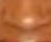

9 1


In [79]:
display(df['Noses'][900])
print(df['Ages'][0], df['Genders'][0])